In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

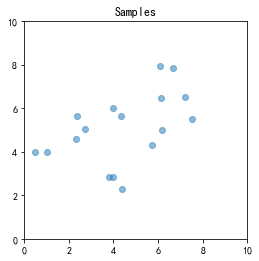

In [2]:
np.random.seed(4342)

x1 = np.random.rand(7, 2) * 4 + 2 
y1 = [0] * len(x1)

x2 = np.random.rand(7, 2) * 4 + 4
y2 = [1] * len(x2)

xt = np.array([
    [1, 4],
    [0.5, 4],
    [4, 6],
])
yt = np.array([1, 0, 1])

x = np.concatenate([x1, x2, xt], axis=0)
y = np.concatenate([y1, y2, yt])

plt.figure(figsize=(4, 4))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [3]:
class KMeans(object):
    
    def __init__(self, px, nums=2):
        self.x = px
        self.nums = nums
        self.centers = None
        self.randomCenters()
        self.distance_array = None
        self.distance_label = None
        self.centers_new = None
        self.centers_err = None
        pass
    
    def show(self):
        print(f"self.x.shape = {self.x.shape}, self.centers = {self.centers}")
        # print(f"self.distance_array = {self.distance_array}")
        # print(f"self.centers_err = {self.centers_err}")
        pass
    
    def randomCenters(self):
        np.random.seed(412094)    
        nums = self.nums
        idxs = list()
        for i in range(nums):
            while True:
                idx = np.random.randint(0, len(self.x))
                if idx not in idxs:
                    idxs.append(idx)
                    break
                else:
                    continue
        centers = list()   
        for idx in idxs:
            centers.append(self.x[idx])
        self.centers = np.array(centers)
        pass
    
    def distanceCompute(self):
        distance_array = list()
        for i in range(len(self.x)):
            distances = list()
            for center in self.centers:
                sample = self.x[i, :]
                distance = np.sqrt(np.sum((sample - center)**2))
                distances.append(distance)
            distance_array.append(distances)
        self.distance_array = np.array(distance_array)
        pass
    
    def distanceLabel(self):
        label = self.distance_array.argmin(axis=1)
        self.distance_label = label
        pass
    
    
    def distanceCenter(self):
        samples = dict()
        for i in range(len(self.x)):
            center = self.distance_label[i] 
            if center not in samples.keys():
                samples[center] = [self.x[i]]
            else:
                samples[center].append(self.x[i])
        for k, v in samples.items():
            samples[k] = np.array(v)
        centers = list()
        for k, v in samples.items():
            centers.append(v.mean(axis=0))    
        self.centers_new = np.array(centers)   
        pass
    
    def centersDistance(self):
        error = 0
        for i in range(len(self.centers)):
            cen1 = self.centers[i]
            cen2 = self.centers_new[i]
            err = np.sqrt(np.sum(cen1-cen2)**2)
            error += err
        self.centers_err = error
        pass
    
    def changeCenters(self):
        self.centers = self.centers_new
        pass
    
    def run(self, loops):
        for loop in range(loops):
            kmeans.distanceCompute()
            kmeans.distanceLabel()
            kmeans.distanceCenter()
            kmeans.centersDistance()
            kmeans.changeCenters()
            print(f"loop = {loop}, self.centers_err = {self.centers_err}")
        pass
    
    pass

kmeans = KMeans(x, nums=5)
kmeans.run(loops=10)
kmeans.centers

loop = 0, self.centers_err = 6.123483318147332
loop = 1, self.centers_err = 1.0318787483887562
loop = 2, self.centers_err = 0.0
loop = 3, self.centers_err = 0.0
loop = 4, self.centers_err = 0.0
loop = 5, self.centers_err = 0.0
loop = 6, self.centers_err = 0.0
loop = 7, self.centers_err = 0.0
loop = 8, self.centers_err = 0.0
loop = 9, self.centers_err = 0.0


array([[4.05055051, 2.65134787],
       [1.78121696, 4.65882484],
       [5.05873715, 5.23701491],
       [7.35972518, 6.00446634],
       [6.29883447, 7.43434444]])

# 决策边界背景

In [4]:
idx = np.arange(-0, 10, 0.05)
idy = np.arange(-0, 10, 0.05)

idxx, idyy = np.meshgrid(idx, idy)
idt = np.c_[idxx.ravel(), idyy.ravel()]
# print(idt)
# print(idt.shape)

distance_array = list()
for i in range(len(idt)):
    distances = list()
    for center in kmeans.centers:
        sample = idt[i, :]
        distance = np.sqrt(np.sum((sample - center)**2))
        distances.append(distance) 
    distance_array.append(distances)
distance_array = np.array(distance_array)
idzz = distance_array.argmin(axis=1).reshape(idxx.shape)

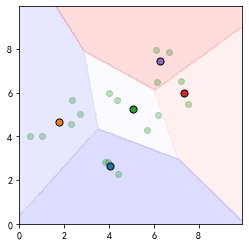

In [5]:
plt.figure(figsize=(4, 4))
plt.contourf(idxx, idyy, idzz, alpha=0.15, cmap="bwr")
plt.scatter(x[:, 0].ravel(), x[:, 1].ravel(), c="green", alpha=0.25, cmap="bwr")
for center in kmeans.centers:
    plt.scatter(center[0], center[1], alpha=1, s=50, edgecolors="black")
plt.show()